**Gradient Descent**  

Different from the implementation from the course, I will attempt to implement Gradient Descent using vectorization.

In [321]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
x_train = np.array([2., 4.])
y_train = np.array([12., 18.])

In [323]:
def f_wb(w, b, x):
    y = np.array([])
    for i in range(len(x)):
        y = np.append(y, np.array([w * x[i] + b]))
    
    return y

In [324]:
f_wb(18, 11, x_train)

array([47., 83.])

In [325]:
def SquaredMeanError(x_set, y_set):
    m = len(x_set)
    sum_error = np.sum(((x_set - y_set)**2)/(2*m))

    return sum_error

In [326]:
def Gradient(w = None, b = None, function = f_wb, x_set = None, y_set = None):
    m = len(x_set)
    f = function
    
    df_dw = np.sum(((f(w, b, x_set) - y_set) * x_set)) / m
    df_db = np.sum((f(w, b, x_set) - y_set)) / m

    return df_dw, df_db

In [327]:
print(Gradient(0, 0, f_wb, x_train, y_train))

(-48.0, -15.0)


In [328]:
def GradientDescent(w_init = 0, b_init = 0, learning_rate = 0.001, iteration = 1000, function = f_wb, x_set = None, y_set = None):
    w = w_init
    b = b_init
    a = learning_rate
    f = function
    loss_hist = []
    p_hist = []
    
    for i in range(iteration):
        df_dw, df_db = Gradient(w, b, f, x_set, y_set)
        w = w - a * df_dw
        b = b - a * df_db
        loss_hist.append(SquaredMeanError(y_set, f(w, b, x_set)))
        p_hist.append([w, b])

    return w, b, loss_hist, p_hist

In [329]:
iteration = 20000
w, b, loss, params = GradientDescent(x_set=x_train, y_set=y_train, learning_rate=0.004, iteration=iteration)
[w_trained, b_trained] = params[-1]
print(
    "w after trained: " + str(w_trained) + "\n"
     + "b after trained: " +str(b_trained)
)

w after trained: 3.0009209911716836
b after trained: 5.996958172795596


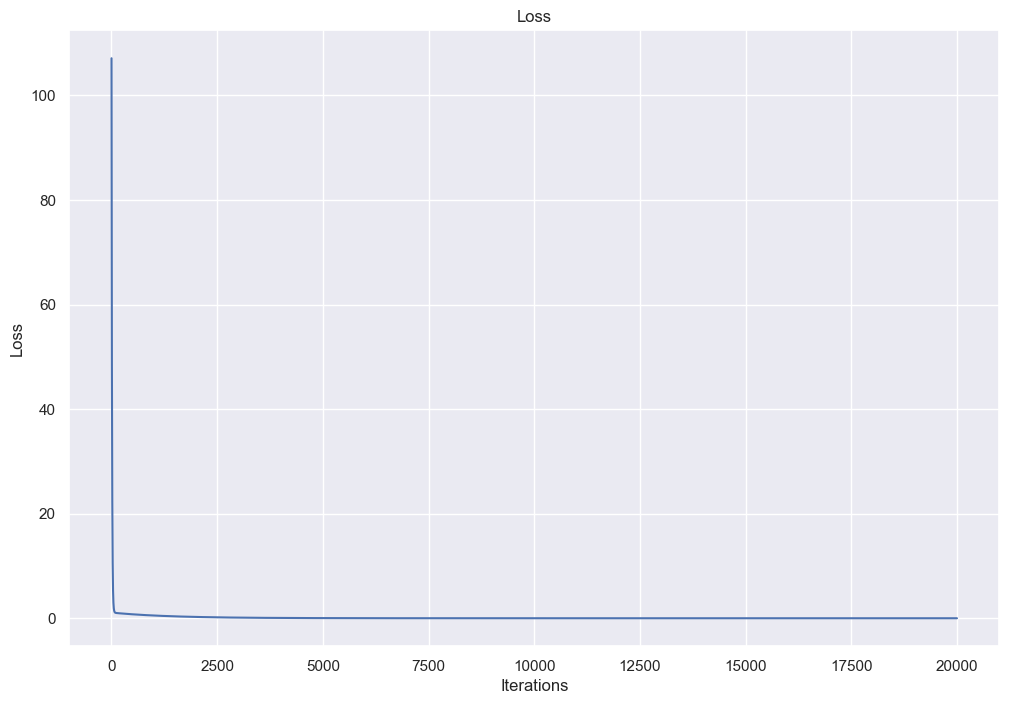

In [330]:
i = range(1, iteration + 1)
plt.figure(figsize=(12, 8))
plt.plot(i, loss)
plt.title("Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.show();

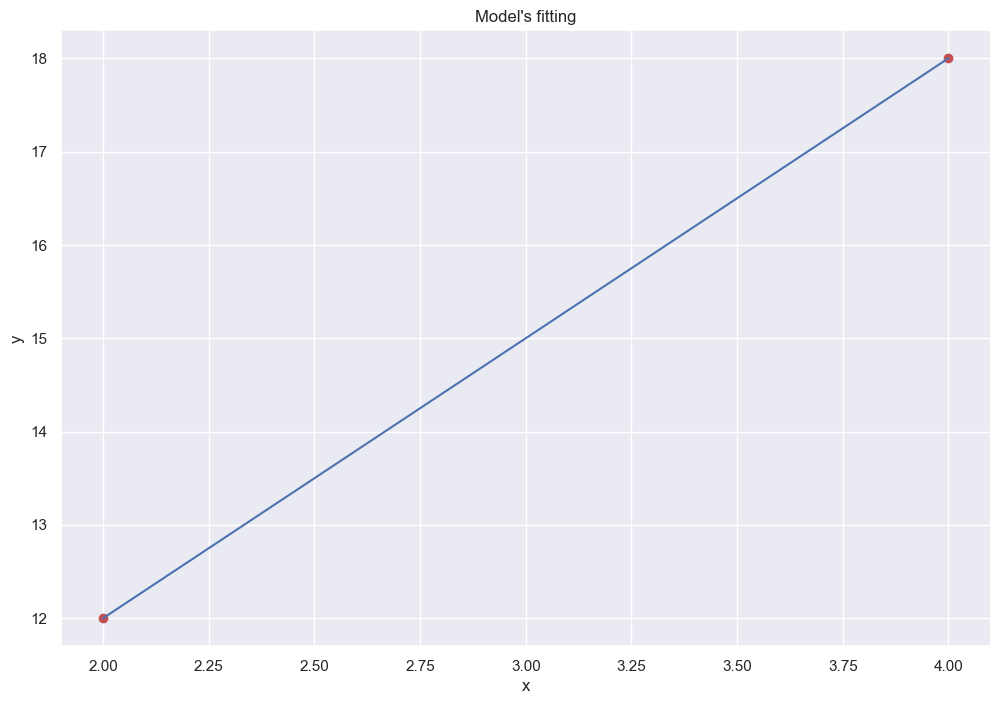

In [331]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, marker="o", color = "r")
plt.plot(x_train, f_wb(w_trained, b_trained, x_train))

plt.title("Model's fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.show();